<a href="https://colab.research.google.com/github/Abrar-2024/week4/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
#!unzip bus-breakdown-and-delays.zip

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import  tensorflow as tf

#Dataset selection
from sklearn.model_selection import train_test_split


#Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Features Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
data = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')


In [4]:
data.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
School_Year,147972,4,2016-2017,83141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Busbreakdown_ID,147972.0,NaN,NaN,NaN,1287778.916971,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Run_Type,147883,10,Special Ed AM Run,85990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bus_No,147972,10765,9354,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route_Number,147884,11283,1,2569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reason,147870,10,Heavy Traffic,87426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Schools_Serviced,147972,5180,C814,1735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occurred_On,147972,70108,01/25/2016 07:30:00 AM,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Created_On,147972,75822,01/26/2016 07:57:00 AM,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boro,141654,11,Bronx,40995,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

<Axes: >

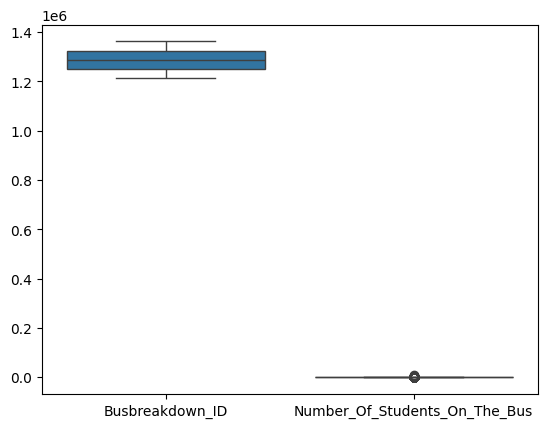

In [8]:
# Detect outliers

sns.boxplot(data=data)

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [9]:
data.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [10]:
data.shape

(147972, 21)

In [11]:
data.head(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
5,2015-2016,1225671,Special Ed AM Run,12568,P640,Heavy Traffic,24071,10/16/2015 07:20:00 AM,10/28/2015 09:38:00 AM,NaN,...,15mins,3,Yes,Yes,Yes,10/28/2015 09:38:00 AM,NaN,10/28/2015 09:38:12 AM,Running Late,School-Age
6,2015-2016,1226116,Pre-K/EI,9304,4,Heavy Traffic,C353,10/29/2015 08:09:00 AM,10/29/2015 08:11:00 AM,Bronx,...,20MIN,3,Yes,Yes,Yes,10/29/2015 08:11:00 AM,NaN,10/29/2015 08:11:28 AM,Running Late,Pre-K
7,2015-2016,1214953,Pre-K/EI,GV0365,3,Heavy Traffic,C579,09/16/2015 07:57:00 AM,09/16/2015 07:58:00 AM,Bronx,...,10MIN,4,Yes,Yes,No,09/16/2015 07:58:00 AM,NaN,09/16/2015 07:58:19 AM,Running Late,Pre-K
8,2015-2016,1215730,Special Ed AM Run,5628D,Q363,Heavy Traffic,26177,09/18/2015 07:50:00 AM,09/18/2015 07:04:00 AM,Queens,...,45MINS,0,Yes,Yes,No,09/18/2015 07:04:00 AM,NaN,09/18/2015 07:04:29 AM,Running Late,School-Age
9,2015-2016,1226326,Pre-K/EI,0003,03 AM,Other,C494,10/30/2015 06:30:00 AM,10/30/2015 06:57:00 AM,Brooklyn,...,35 Minutes,0,Yes,Yes,No,10/30/2015 06:57:00 AM,NaN,10/30/2015 06:57:13 AM,Running Late,Pre-K


array([<Axes: title={'center': 'Breakdown'}>,
       <Axes: title={'center': 'Running Late'}>, <Axes: >, <Axes: >],
      dtype=object)

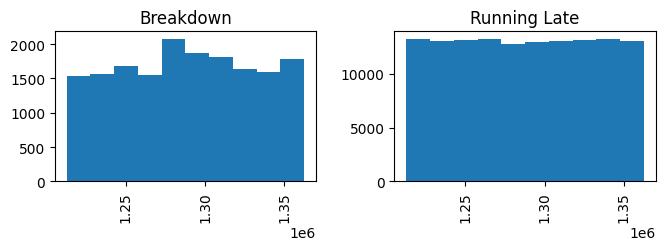

In [12]:
#Numarical Features
data['Busbreakdown_ID'].hist(by=data['Breakdown_or_Running_Late'], layout=(1,4), figsize=(16,2))

array([<Axes: title={'center': 'Breakdown'}>,
       <Axes: title={'center': 'Running Late'}>, <Axes: >, <Axes: >],
      dtype=object)

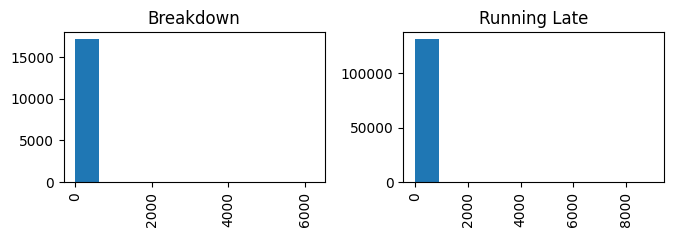

In [13]:
#Numarical Features
data['Number_Of_Students_On_The_Bus'].hist(by=data['Breakdown_or_Running_Late'], layout=(1,4), figsize=(16,2))

<Axes: xlabel='Has_Contractor_Notified_Schools', ylabel='count'>

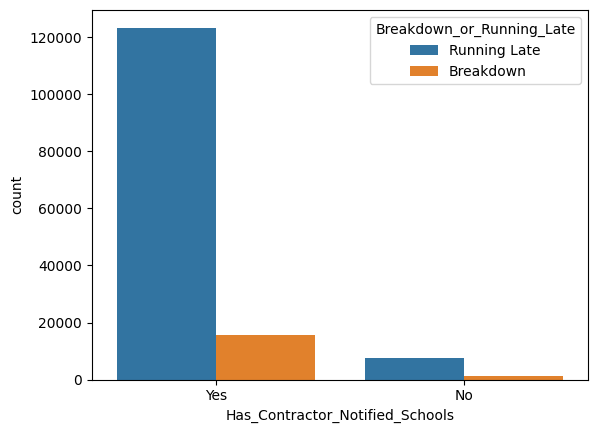

In [14]:
# Distribution of categorical features

sns.countplot(data=data, x='Has_Contractor_Notified_Schools', hue='Breakdown_or_Running_Late')


<Axes: xlabel='Has_Contractor_Notified_Parents', ylabel='count'>

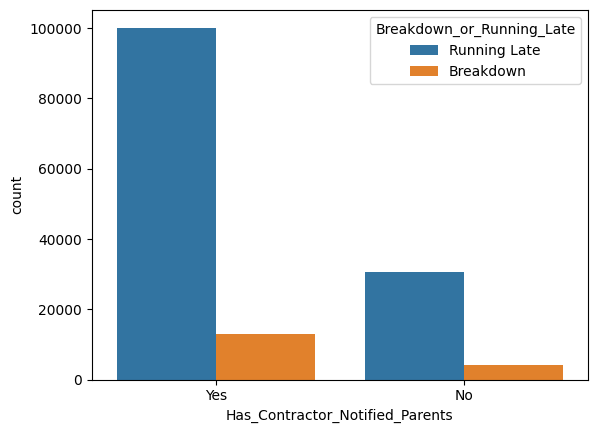

In [15]:
sns.countplot(data=data, x='Has_Contractor_Notified_Parents', hue='Breakdown_or_Running_Late')

<Axes: xlabel='School_Year', ylabel='count'>

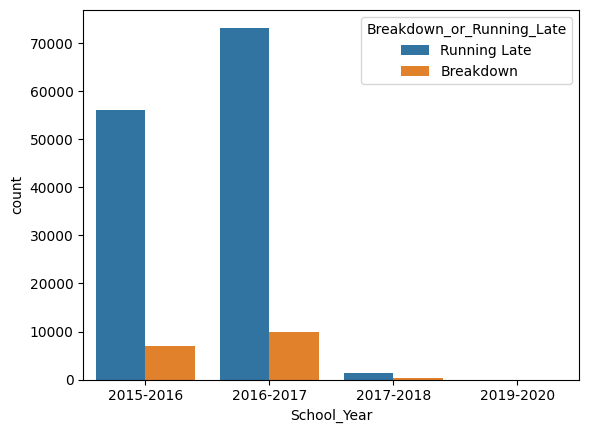

In [16]:
sns.countplot(data=data, x='School_Year', hue='Breakdown_or_Running_Late')

<Axes: xlabel='School_Age_or_PreK', ylabel='count'>

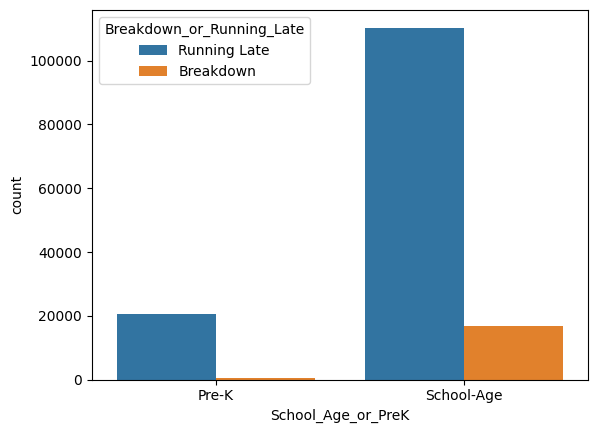

In [17]:
sns.countplot(data=data, x='School_Age_or_PreK', hue='Breakdown_or_Running_Late')

<Axes: >

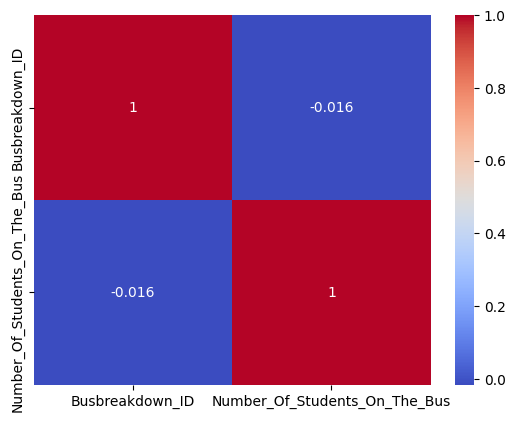

In [18]:
# Correlation matrix
corr = data.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [19]:
data.drop(columns=['Incident_Number','Informed_On', "Has_Contractor_Notified_Parents", "Occurred_On", "Busbreakdown_ID", "How_Long_Delayed","Last_Updated_On", "Bus_Company_Name", "Boro", "Created_On", "Schools_Serviced", "Bus_No", "School_Year", "Route_Number"], inplace=True)

In [20]:
data

,Run_Type,Reason,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,Other,5,Yes,No,Running Late,Pre-K
1,Pre-K/EI,Heavy Traffic,3,Yes,No,Running Late,Pre-K
2,Pre-K/EI,Heavy Traffic,12,Yes,Yes,Running Late,Pre-K
3,Pre-K/EI,Other,11,Yes,Yes,Running Late,Pre-K
4,Pre-K/EI,Other,12,Yes,No,Running Late,Pre-K
...,...,...,...,...,...,...,...
147967,Pre-K/EI,Heavy Traffic,7,Yes,No,Running Late,Pre-K
147968,Pre-K/EI,Heavy Traffic,0,Yes,No,Running Late,Pre-K
147969,Special Ed PM Run,Heavy Traffic,0,Yes,Yes,Running Late,School-Age
147970,Special Ed PM Run,Won`t Start,0,Yes,No,Breakdown,School-Age


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [21]:
data.isnull().sum().sort_values(ascending=False)

,0
Reason,102
Run_Type,89
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0
School_Age_or_PreK,0


In [24]:
from sklearn.impute import SimpleImputer
# Subset of categorical columns
cat = ['Run_Type','Reason']
# Fit Imputer on traing data and ONLY on categorical columns
dataset = SimpleImputer(strategy='most_frequent').fit_transform(data[cat])

data[cat] = dataset

In [25]:
data.isna().sum()

,0
Run_Type,0
Reason,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0
School_Age_or_PreK,0


In [26]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

scaler = RobustScaler()

for col in data.select_dtypes(include='number').columns:

    data[col] = pd.DataFrame(scaler.fit_transform(data[[col]]))

In [27]:
data.head(10)

,Run_Type,Reason,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,Other,1.25,Yes,No,Running Late,Pre-K
1,Pre-K/EI,Heavy Traffic,0.75,Yes,No,Running Late,Pre-K
2,Pre-K/EI,Heavy Traffic,3.00,Yes,Yes,Running Late,Pre-K
3,Pre-K/EI,Other,2.75,Yes,Yes,Running Late,Pre-K
4,Pre-K/EI,Other,3.00,Yes,No,Running Late,Pre-K
5,Special Ed AM Run,Heavy Traffic,0.75,Yes,Yes,Running Late,School-Age
6,Pre-K/EI,Heavy Traffic,0.75,Yes,Yes,Running Late,Pre-K
7,Pre-K/EI,Heavy Traffic,1.00,Yes,No,Running Late,Pre-K
8,Special Ed AM Run,Heavy Traffic,0.00,Yes,No,Running Late,School-Age
9,Pre-K/EI,Other,0.00,Yes,No,Running Late,Pre-K


In [28]:
data.shape

(147972, 7)

In [29]:
# Encoding Categorical data

label_encoding_cols = ['Breakdown_or_Running_Late','Have_You_Alerted_OPT',"Has_Contractor_Notified_Schools"]
one_hot_encoding_cols = ['School_Age_or_PreK','Run_Type','Reason']

In [30]:
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Initialize OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = ohe_encoder.fit_transform(data[one_hot_encoding_cols])

# Create a DataFrame with the one-hot encoded columns
# We use get_feature_names_out() to get the column names for the encoded data
one_hot_data = pd.DataFrame(one_hot_encoded, columns=ohe_encoder.get_feature_names_out(one_hot_encoding_cols))

In [32]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_data], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(one_hot_encoding_cols, axis=1)

data = df_encoded

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate the features and target variable
X = data.drop('Breakdown_or_Running_Late', axis=1)
y = data['Breakdown_or_Running_Late']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [35]:
model = Sequential()

In [36]:
model.add(Dense(units=11, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))

In [38]:
model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             286 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359 (1.40 KB)

 Trainable params: 359 (1.40 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [42]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9163 - loss: 0.1675 - val_accuracy: 0.9180 - val_loss: 0.1685
Epoch 2/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9163 - loss: 0.1690 - val_accuracy: 0.9192 - val_loss: 0.1677
Epoch 3/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9168 - loss: 0.1680 - val_accuracy: 0.9186 - val_loss: 0.1696
Epoch 4/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9161 - loss: 0.1694 - val_accuracy: 0.9186 - val_loss: 0.1680
Epoch 5/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9155 - loss: 0.1710 - val_accuracy: 0.9154 - val_loss: 0.1688
Epoch 6/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9162 - loss: 0.1676 - val_accuracy: 0.9154 - val_loss: 0.1697
Epoch 7/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9169 - loss: 0.1695 - val_accuracy: 0.9151 - val_loss: 0.1681
Epoch 8/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9162 - loss: 0

In [43]:
data.head(10)

,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK_Pre-K,School_Age_or_PreK_School-Age,Run_Type_General Ed AM Run,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,...,Reason_Accident,Reason_Delayed by School,Reason_Flat Tire,Reason_Heavy Traffic,Reason_Late return from Field Trip,Reason_Mechanical Problem,Reason_Other,Reason_Problem Run,Reason_Weather Conditions,Reason_Won`t Start
0,1.25,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.75,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.00,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.75,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.00,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.75,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.75,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.00,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [44]:
model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.1729


[0.16840475797653198, 0.9161006808280945]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [45]:
y_pred = model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [51]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']


training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


epoch_count = range(1, len(training_loss) + 1)

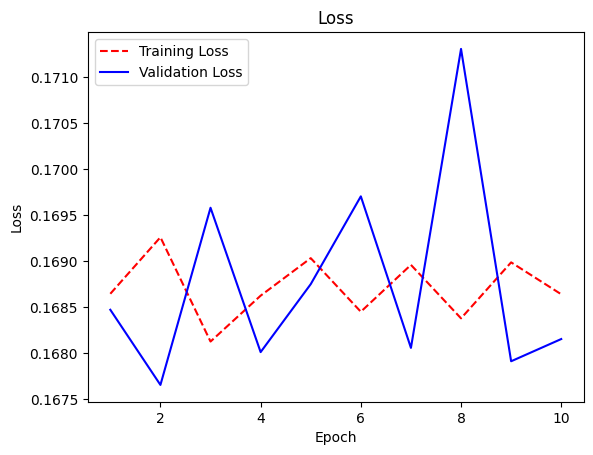

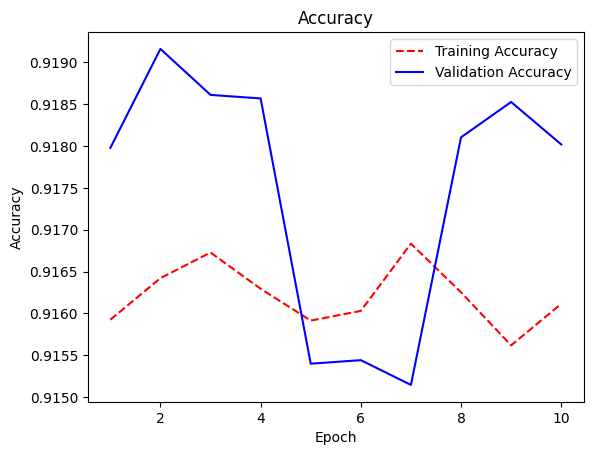

In [53]:
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss")
plt.show()

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, validation_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy")
plt.show()


## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_model.h11')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: